<a href="https://colab.research.google.com/github/Jkhou1000/Project-2/blob/main/Mushroom_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Josh Khoury

Date started:  7/11/2022

Mushroom Edibility Project

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing basic libraries for first part of project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Project 2/CSVS/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#everything is as it should be here, object class.
#this will make modeling data visuals difficult as I have no numerical values to compare it with
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
print(f'NaN values:', df.isna().sum().sum())
print(f'Duplicated Values:', df.duplicated().any())
#No NAN or duplicates.

NaN values: 0
Duplicated Values: False


In [7]:
Hyops = df.dtypes[df.dtypes=='object'].index
for col in Hyops:
  print(f'Column:{col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')
#There aren't any NaN Values but some of these datapoints have ? which is  techincally missing
#However I won't need to impute or fill it at least.

Column:class
e    4208
p    3916
Name: class, dtype: int64



Column:cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



Column:cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



Column:cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



Column:bruises
f    4748
t    3376
Name: bruises, dtype: int64



Column:odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



Column:gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



Column:gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



Column:gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



Column:gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtyp

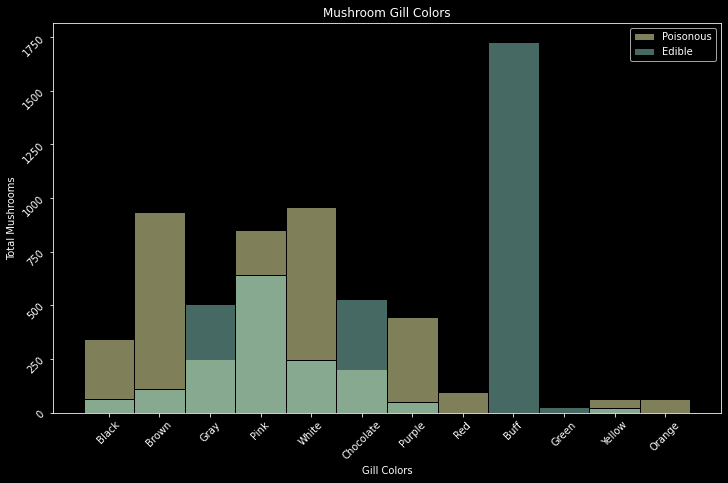

In [12]:
labels = ['Black', 'Brown', 'Gray', 'Pink', 'White', 'Chocolate', 'Purple', 'Red', 'Buff', 'Green', 'Yellow', 'Orange']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,6))

#Setting Parameters
plt.tight_layout()
sns.histplot(data=df, x='gill-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Gill Colors')
ax.set_xticklabels(labels=labels)
ax.set(title='Mushroom Gill Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Poisonous', 'Edible'])
#Buff is the most common color for mushroom gils, and all of them are edible. this is good info
#Since the target is the Class (Edible or Poisonous) it best to use them as a hue and compare

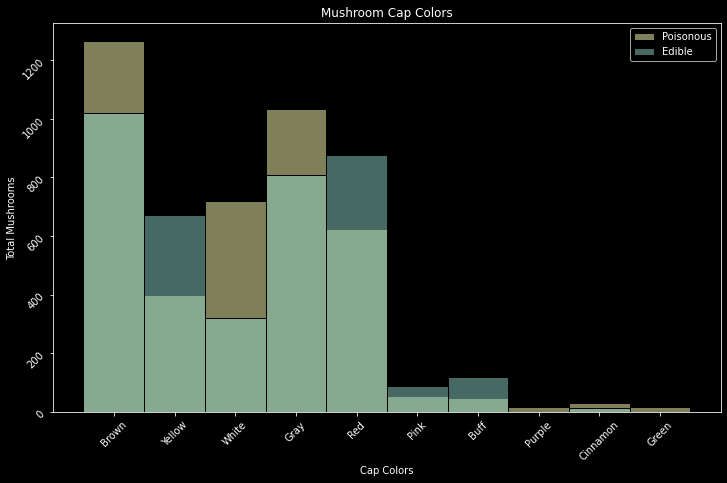

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
labels2 = ['Brown', 'Yellow', 'White',  'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green']

#Now to vizualize the Cap colors

plt.tight_layout()
sns.histplot(data=df, x='cap-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Cap Colors')
ax.set_xticklabels(labels=labels2)
ax.set(title='Mushroom Cap Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Poisonous', 'Edible'])